In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

from scipy.io import loadmat
import numpy as np
from scipy.special import kv, iv
from numpy import pi, real, imag, exp, sqrt, sum, sin, cos
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
mat_contents = loadmat('xn.mat')
xn = mat_contents['xn']
mat_contents = loadmat('yn.mat')
yn = mat_contents['yn']
pi = np.pi

psi3 = lambda k, s, b: (1 / 8) * pi ** (-2) * s * (
    ((iv((-2) + k, s) + iv(k, s)) * iv(1 + k, s) + iv((-1) + k, s) * (iv(k, s) + iv(2 + k, s))) * (
        (-1) * b * s * iv((-1) + k, b * s) * kv(k, s) + iv(k, b * s) * (
            s * kv((-1) + k, s) + 2 * ((-1) + k) * kv(k, s))) + (-2) * (
        s * iv((-1) + k, s) + (-1) * ((-1) + k) * iv(k, s)) * (
        b * iv((-1) + k, b * s) * iv(1 + k, s) * kv((-1) + k, s) + (-1) * iv(k, b * s) * iv(1 + k, s) * kv(k,
                                                                                                           s) + iv(
                (-1) + k, s) * (
            (-1) * iv(k, b * s) * kv(k, s) + b * iv(1 + k, b * s) * kv(1 + k, s))))
pi3 = lambda k, s, b: (1 / 4) * pi ** (-2) * (
    (-1) * s * iv(k, s) * iv(k, b * s) * iv(1 + k, s) * kv(k, s) + b * s * iv((-1) + k, b * s) * iv(1 + k,
                                                                                                    s) * (
        iv(k, s) * kv((-1) + k, s) + 2 * iv((-1) + k, s) * kv(k, s)) + iv((-1) + k,
                                                                          s) * (
        (-1) * iv(k, b * s) * (s * iv(k, s) * kv(k, s) + 2 * iv(1 + k, s) * (
            s * kv((-1) + k, s) + 2 * ((-1) + k) * kv(k, s))) + b * s * iv(k, s) * iv(1 + k, b * s) * kv(1 + k,
                                                                                                         s)))
omega3 = lambda k, s, b: (1 / 4) * pi ** (-2) * s ** (-1) * (s * iv(k, s) ** 2 * (
    (-2) * k * iv(k, b * s) * (s * kv((-1) + k, s) + 2 * k * kv(k, s)) + b * iv((-1) + k, b * s) * (
        (4 * k + s ** 2) * kv((-1) + k, s) + 2 * k * s * kv(k, s)) + (-1) * b * s ** 2 * iv(1 + k,
                                                                                            b * s) * kv(
            1 + k, s)) + s * iv((-1) + k, s) ** 2 * (2 * k * iv(k, b * s) * (
    s * kv((-1) + k, s) + 2 * ((-1) + k) * kv(k, s)) + (-1) * b * s * iv((-1) + k, b * s) * (
                                                         s * kv((-1) + k, s) + 2 * k * kv(k,
                                                                                          s)) + b * s ** 2 * iv(
        1 + k, b * s) * kv(1 + k, s)) + 2 * iv((-1) + k, s) * iv(k, s) * (
                                                                 (-2) * k ** 2 * iv(k, b * s) * (
                                                                     s * kv((-1) + k, s) + 2 * ((-1) + k) * kv(
                                                                             k,
                                                                             s)) + b * s * iv(
                                                                         (-1) + k, b * s) * (
                                                                     ((-1) + k) * s * kv((-1) + k,
                                                                                         s) + 2 * k ** 2 * kv(k,
                                                                                                              s)) + (
                                                                     -1) * b * ((-1) + k) * s ** 2 * iv(1 + k,
                                                                                                        b * s) * kv(
                                                                         1 + k,
                                                                         s)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


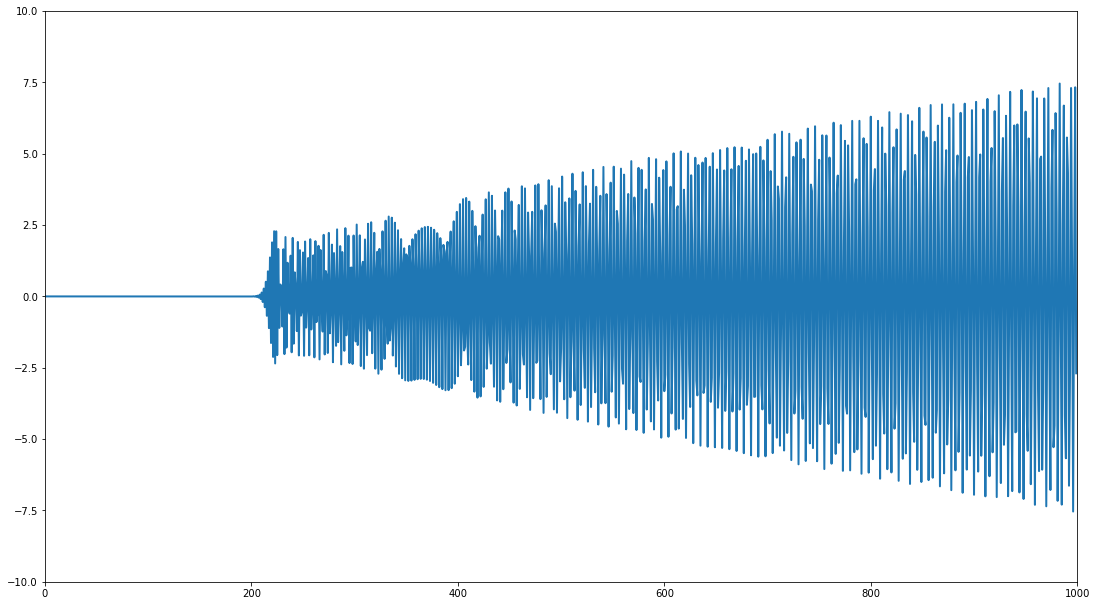

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlim(( 0, 1000))
ax.set_ylim((-10, 10))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(k):
    x = np.arange(1000)
    y = np.real(psi3(k, xn[k, x], 0.5))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1000, blit=True)

HTML(anim.to_html5_video())
# rc('animation', html='html5')
# anim

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


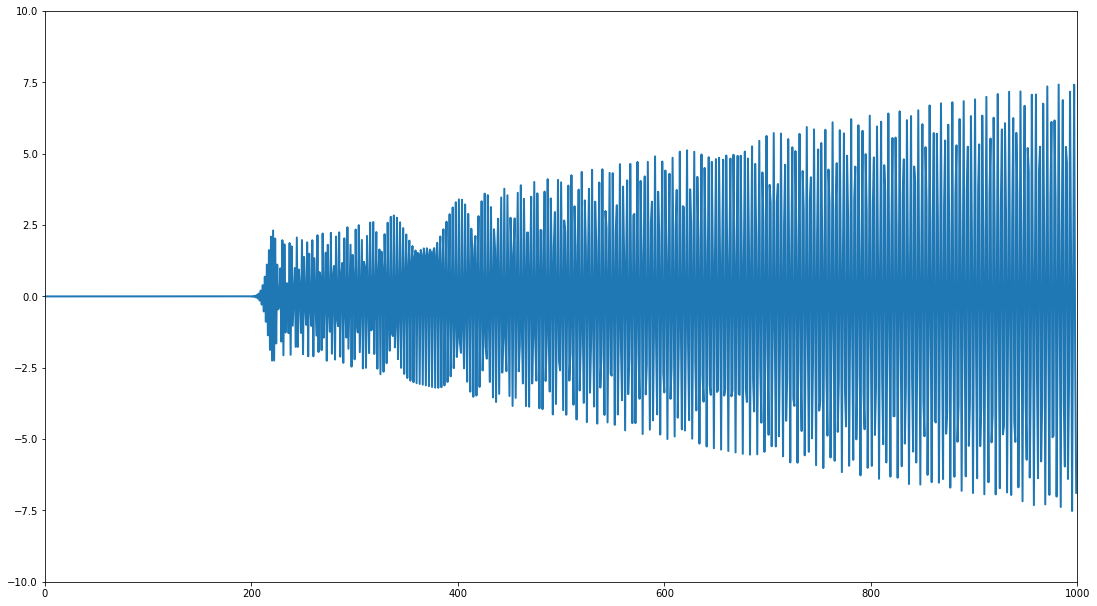

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlim(( 0, 1000))
ax.set_ylim((-10, 10))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(k):
    x = np.arange(1000)
    y = np.imag(psi3(k, xn[k, x], 0.5))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1000, blit=True)

HTML(anim.to_html5_video())
# rc('animation', html='html5')
# anim

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


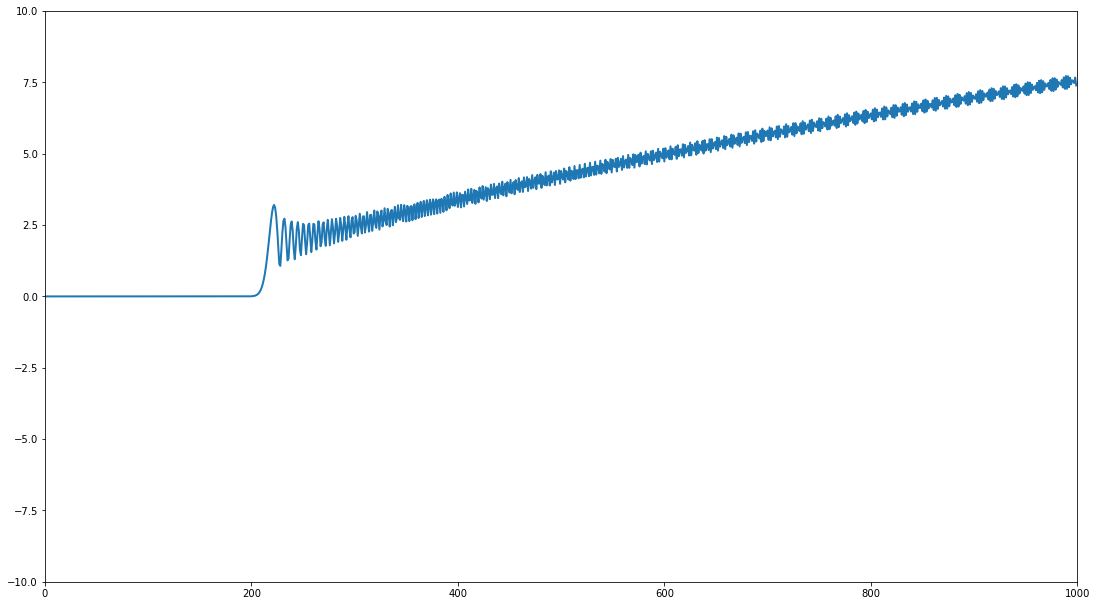

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_xlim(( 0, 1000))
ax.set_ylim((-10, 10))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(k):
    x = np.arange(1000)
    y = np.abs(psi3(k, xn[k, x], 0.5))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1000, blit=True)

HTML(anim.to_html5_video())
# rc('animation', html='html5')
# anim